In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn import metrics 
import math
from sklearn.tree import DecisionTreeClassifier 

# Dataset

In [2]:
#Reading the Dataset
df = pd.read_csv("Downloads/HousePricePrediction.csv")
#Displaying first 5 records of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
#Displaying last 5 records of Dataset
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
#Setted all the values in the dataset to display in .5f format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
#After setting to .5f format displaying first 10 records of Dataset
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.00000,2.00000,1.00000,880,6380,1.00000,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.00000,2.00000,2.00000,1350,2560,1.00000,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.00000,4.00000,2.50000,2710,35868,2.00000,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.00000,3.00000,2.50000,2430,88426,1.00000,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.00000,4.00000,2.00000,1520,6200,1.50000,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [7]:
#Displaying Number of Records
values = df.select_dtypes(include=np.number)

values.shape

(4600, 13)

In [8]:
#Information Regarding the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
#Description of the Dataset with the count, mean, standard deviation
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000
mean,551962.98847,3.40087,2.16082,2139.34696,14852.51609,1.51207,0.00717,0.24065,3.45174,1827.26543,312.08152,1970.78630,808.60826
std,563834.70255,0.90885,0.78378,963.20692,35884.43614,0.53829,0.08440,0.77840,0.67723,862.16898,464.13723,29.73185,979.41454
min,0.00000,0.00000,0.00000,370.00000,638.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000
25%,322875.00000,3.00000,1.75000,1460.00000,5000.75000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000
50%,460943.46154,3.00000,2.25000,1980.00000,7683.00000,1.50000,0.00000,0.00000,3.00000,1590.00000,0.00000,1976.00000,0.00000
75%,654962.50000,4.00000,2.50000,2620.00000,11001.25000,2.00000,0.00000,0.00000,4.00000,2300.00000,610.00000,1997.00000,1999.00000
max,26590000.00000,9.00000,8.00000,13540.00000,1074218.00000,3.50000,1.00000,4.00000,5.00000,9410.00000,4820.00000,2014.00000,2014.00000


In [10]:
#As Price is the main in our project dispalying the price description
pr = df['price']

pr.describe()

count       4600.00000
mean      551962.98847
std       563834.70255
min            0.00000
25%       322875.00000
50%       460943.46154
75%       654962.50000
max     26590000.00000
Name: price, dtype: float64

# Plotting graphs between different attributes

In [15]:
#Plotted scatter plot between price vs year built
built_year = pd.concat([df['price'], df['yr_built']], axis=1)
fig = px.scatter(df, x = 'yr_built', y = 'price', template = 'plotly_white', title = 'Price vs Year Built',labels=dict(price="Price ", yr_built="Year built "))
fig.update_layout(yaxis_range=[0 , 6000000], width=750, height=530)
fig.show() 

In [17]:
#Plotted scatter plot between price vs living space
sqft = pd.concat([df['price'], df['sqft_living']], axis=1)
fig = px.scatter(df, x = 'sqft_living', y = 'price', template='plotly_white', title='Price vs Living space', labels=dict(price="Price ", sqft_living="Sqft_living"))
fig.update_layout(yaxis_range=[0 , 6000000], xaxis_range=[0 , 10000], width=750, height=530)
fig.show()

In [18]:
df['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [22]:
#Box plot of price and waterfront
import plotly.express as ptx
fig = ptx.box(df, y="price", x="waterfront",template='plotly_white', labels=dict(price="Price ", waterfront="Waterfront"))
fig.update_layout(yaxis_range=[0 , 6000000], width=750, height=530)
fig.show()


In [23]:
#Plotted scatter plot between price vs year renovated
renovate_year = pd.concat([df['price'], df['yr_renovated']], axis=1)
fig = px.scatter(df, x = 'yr_renovated', y = 'price', template='plotly_white', title='Price vs Year renovated', labels=dict(price="Price ", yr_renovated="Year Renovated"))
fig.update_layout(yaxis_range=[0 , 6000000], xaxis_range=[1912 , 2022], width=750, height=530)
fig.show()

In [24]:
#Sorting the year renovated column
df['yr_renovated'].value_counts().sort_index(ascending=False)

2014      72
2013      61
2012      45
2011      54
2010      30
2009     109
2008      45
2007       7
2006      68
2005      95
2004      77
2003     151
2002      41
2001     109
2000     170
1999      41
1998      40
1997      28
1996      22
1995       2
1994      57
1993      39
1992      32
1991       1
1990      16
1989      55
1988      43
1987       1
1986       5
1985      29
1984      10
1983      41
1982      22
1981       1
1980       2
1979      32
1978       3
1977       1
1975       1
1974       6
1972      17
1971       5
1970       9
1969      11
1968       9
1966       1
1963      12
1960       1
1958       5
1956      15
1955       2
1954       8
1953       1
1948       1
1945       7
1934       6
1923      57
1913       1
1912      33
0       2735
Name: yr_renovated, dtype: int64

In [28]:
#Plotted scatter plot between price vs year renovated vs condition
fig = px.scatter(df, x = 'yr_renovated', y = 'price', size = 'condition', hover_name = 'city', color = 'condition', 
           color_discrete_sequence=px.colors.sequential.swatches_continuous(), template = 'plotly_white', title = 'Price vs Year Renovated vs Condition',
                 labels={
                     "price": "Price",
                     "yr_renovated": "Year Renovated",
                     "condition": "House <br> Condition"})
fig.update_layout(yaxis_range=[0 , 6000000], xaxis_range=[1912, 2022], width=750, height=530)
fig.show()

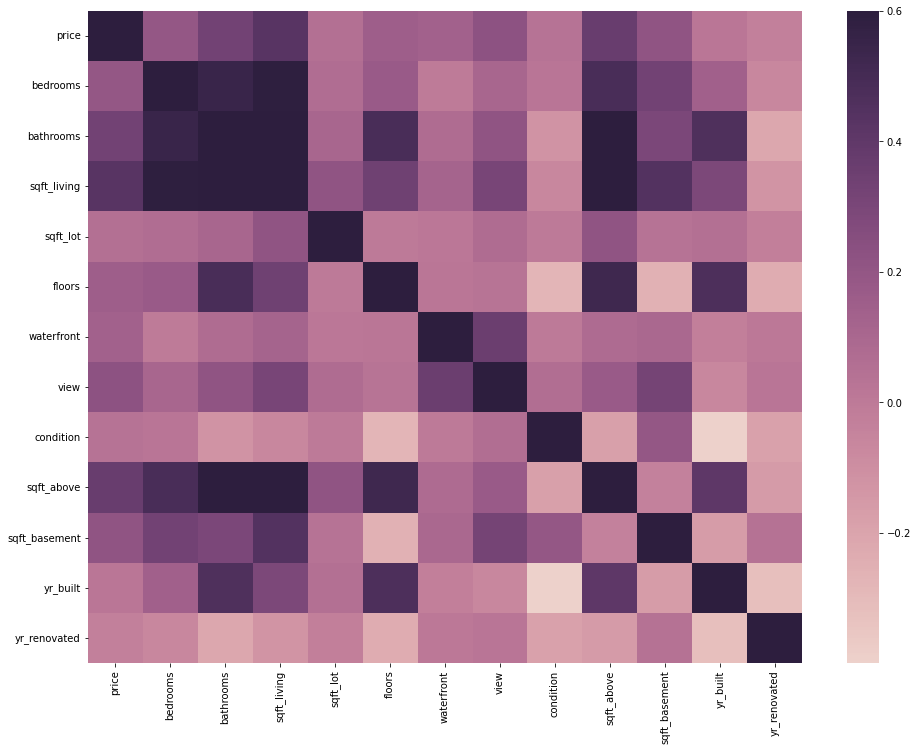

In [33]:
#correlation matrix of the dataset
matrix = df.corr()
f, axi = plt.subplots(figsize=(16,12)) 
axi=sns.heatmap(matrix,cmap=sns.cubehelix_palette(as_cmap=True),vmax = 0.6); 

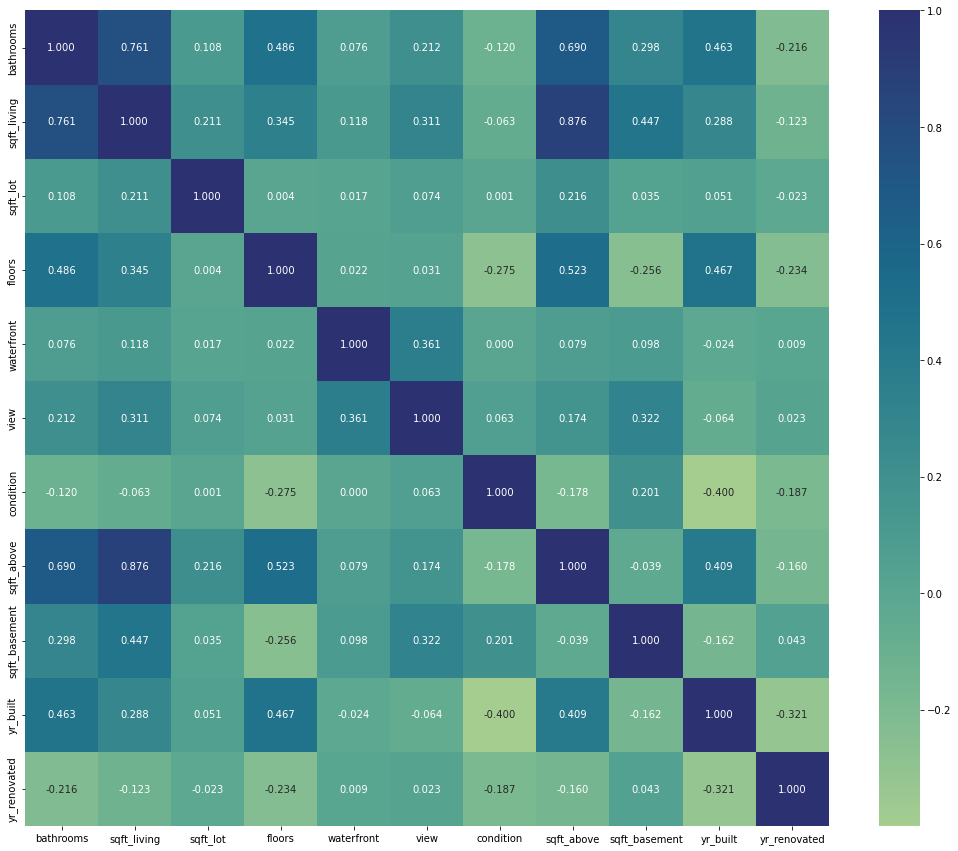

In [37]:
plt.figure(figsize=(18,15))
sns.heatmap(data=df.iloc[:,3:].corr(),annot=True,fmt='.3f',cmap="crest")
plt.show()

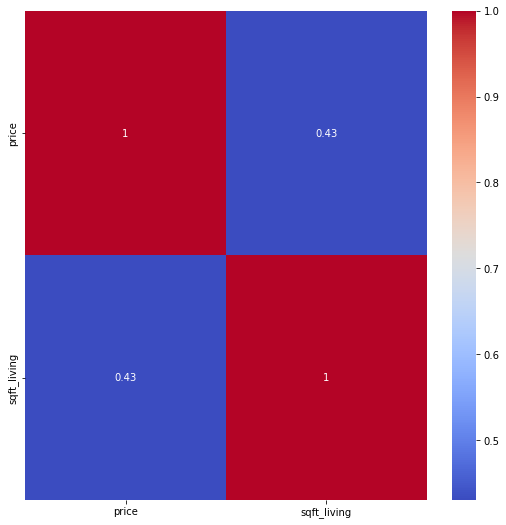

In [39]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0.4]
plt.figure(figsize=(9,9))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

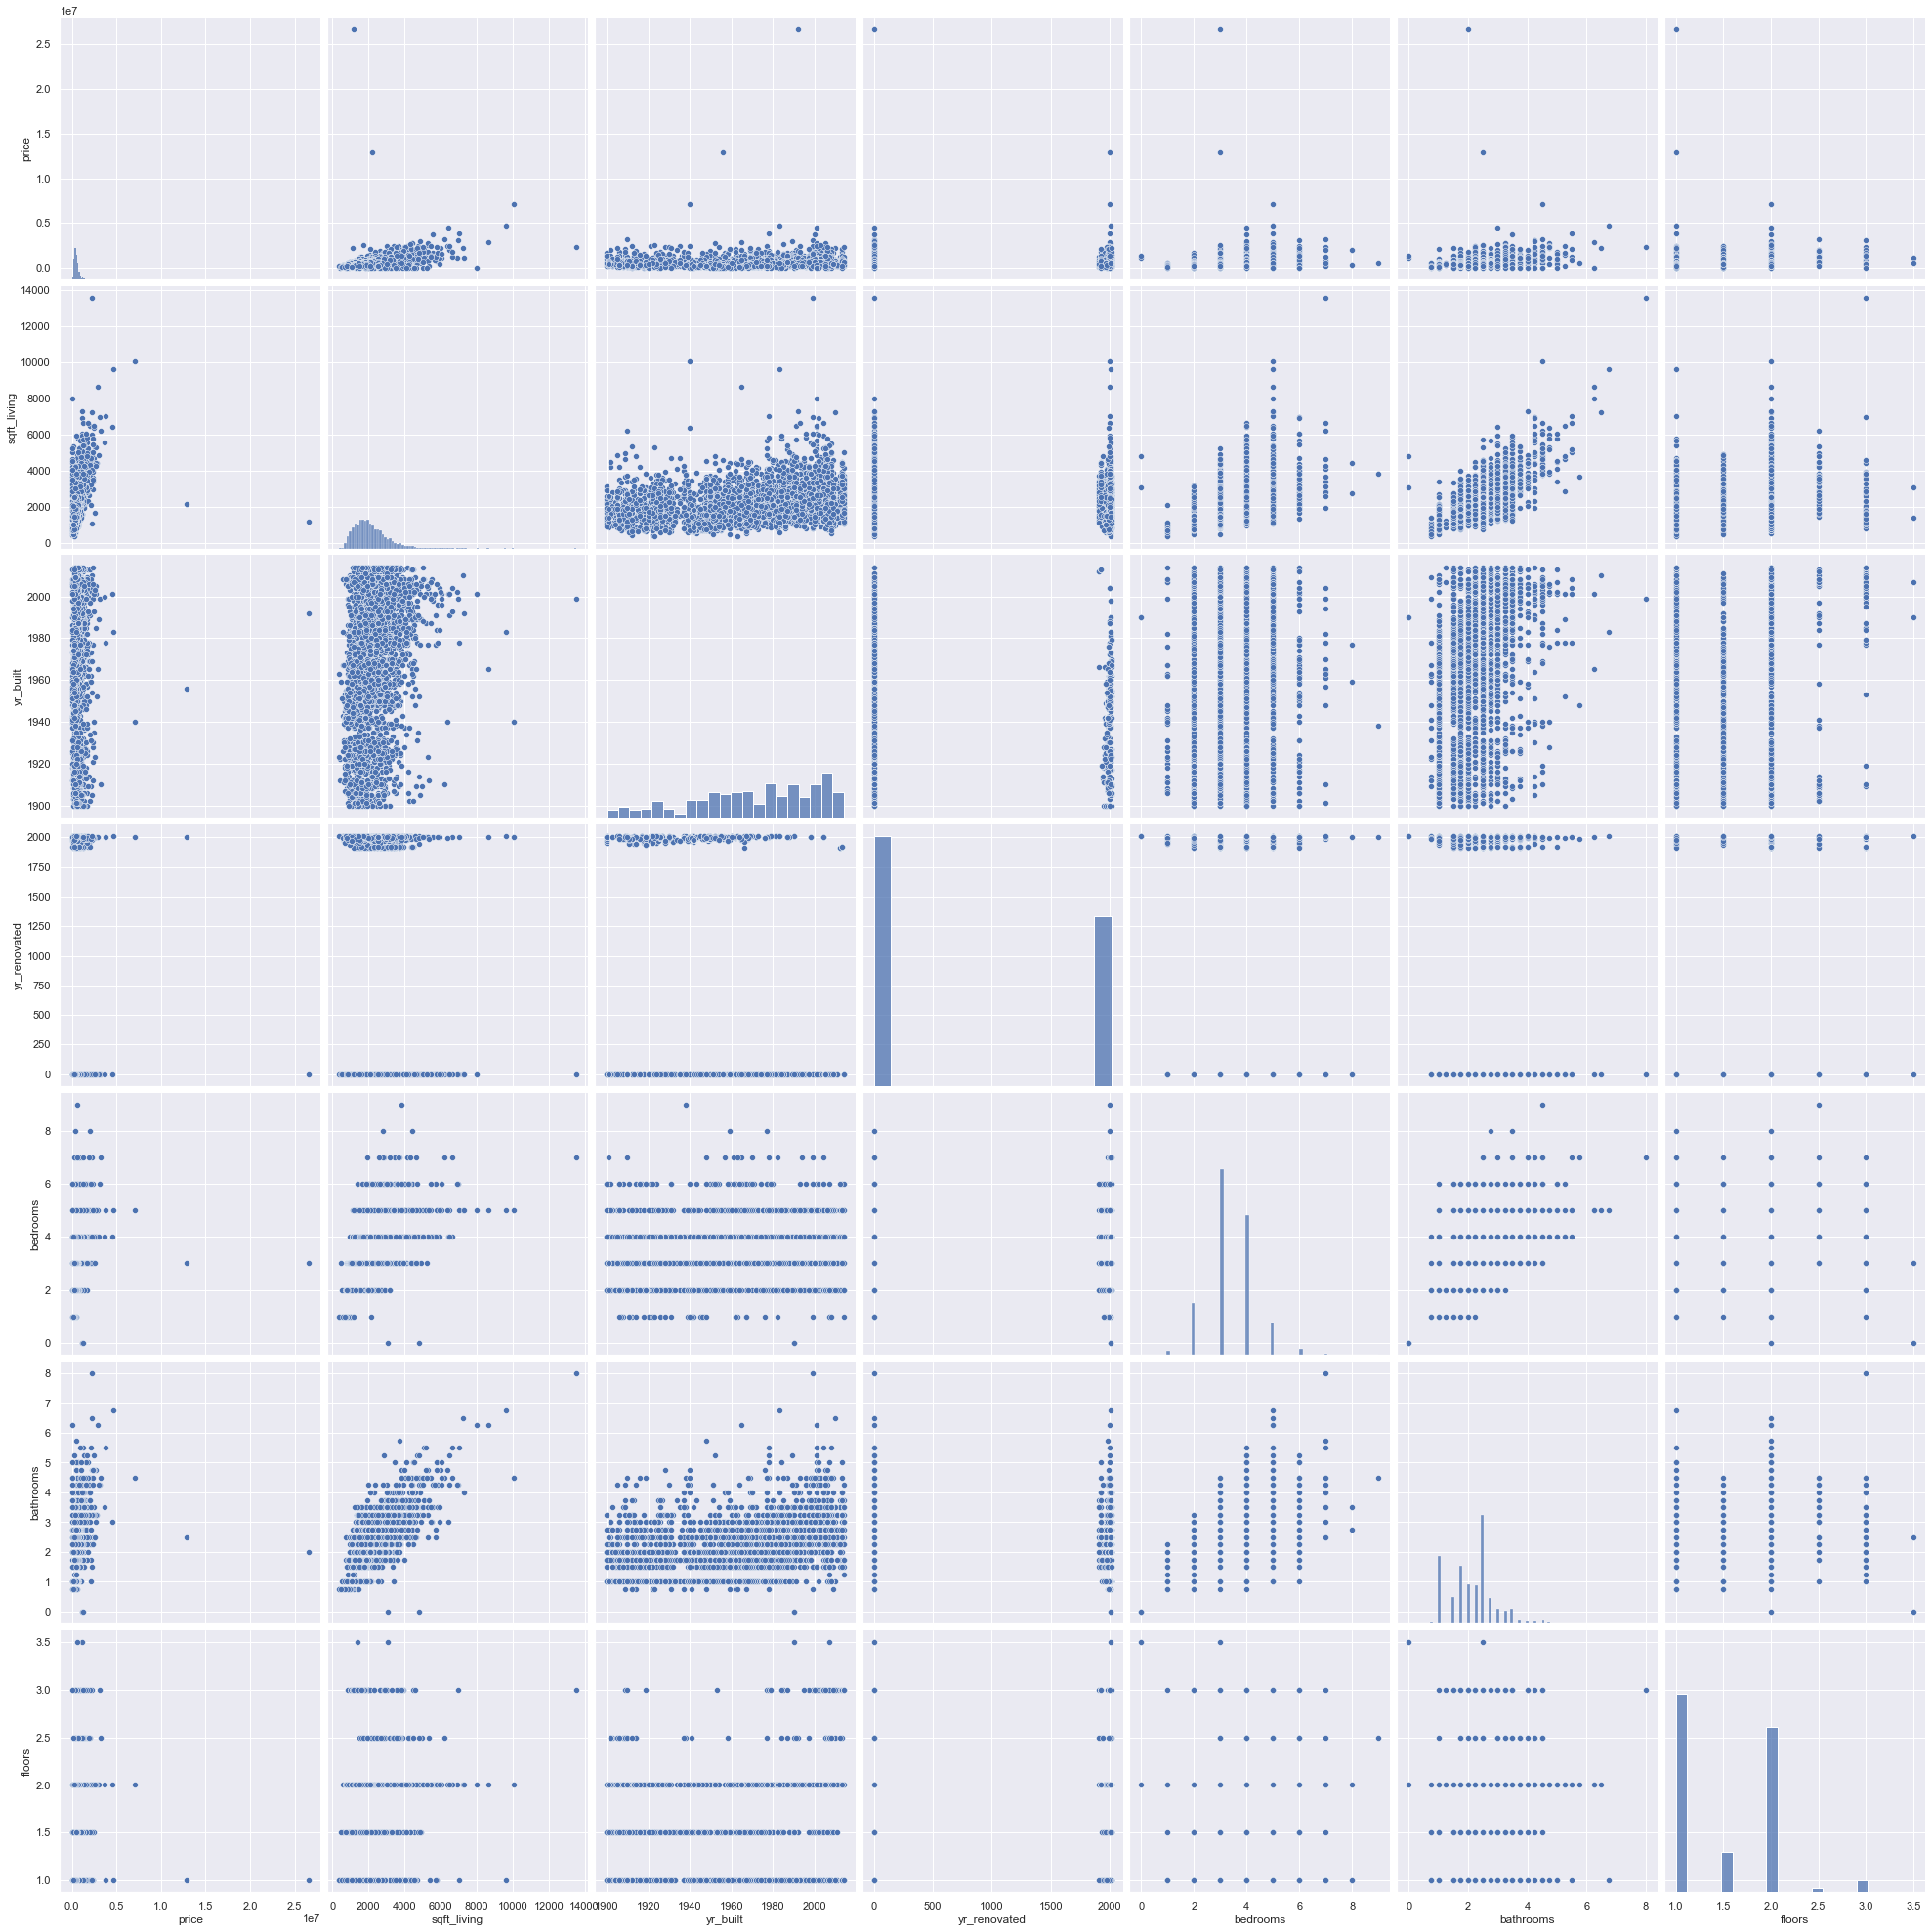

In [40]:
#Plotted pairplot between the columns.
#The relationship between the given data is visualized using a pairplot, where the variables may be continuous or categorical.
sns.set()
colrs = ['price', 'sqft_living', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'floors']
sns.pairplot(df[colrs], height = 4.0)
plt.show();

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

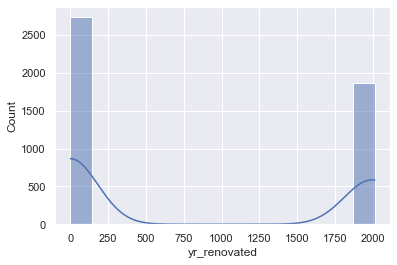

In [42]:
#Histplot for year renovated
sns.histplot(df.yr_renovated, kde=True)

In [43]:
df.yr_renovated = df.yr_renovated.apply(lambda x: 0 if x==0 else 1)

<AxesSubplot:xlabel='price', ylabel='Count'>

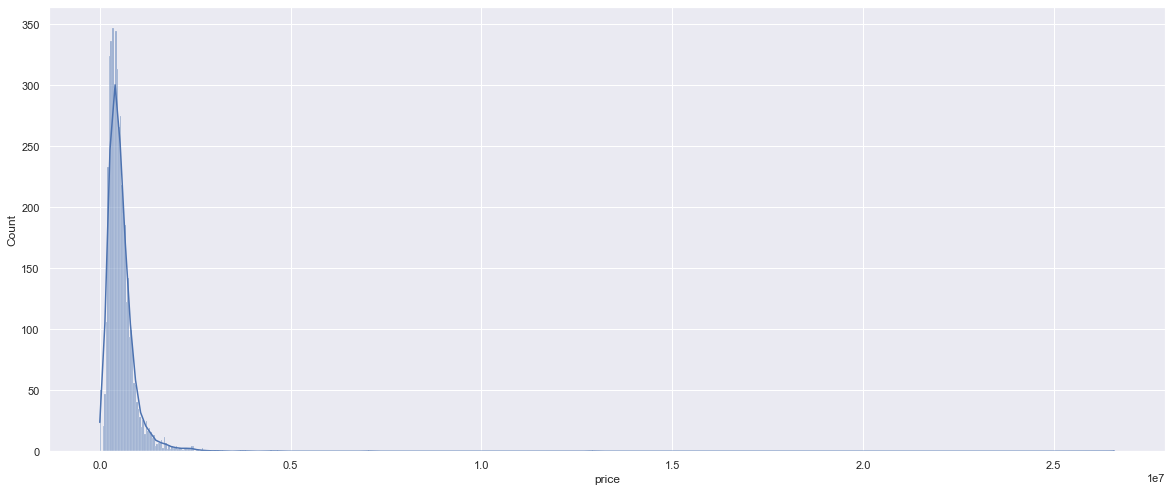

In [45]:
#Histplot for price
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 18))
gridpl = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
axi = fig.add_subplot(gridpl[0, :])
sns.histplot(df['price'], ax=axi, kde=True)

# Data Cleaning

In [46]:
#Dropping the columns as they are unnecessary
df.drop(df.columns[[0, 14,16,17]], axis=1, inplace=True)

In [47]:
#After dropping few columns checking first 10 records of Dataset
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,1,Shoreline
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,Seattle
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,Kent
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,Bellevue
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1,Redmond
5,490000.00000,2.00000,1.00000,880,6380,1.00000,0,0,3,880,0,1938,1,Seattle
6,335000.00000,2.00000,2.00000,1350,2560,1.00000,0,0,3,1350,0,1976,0,Redmond
7,482000.00000,4.00000,2.50000,2710,35868,2.00000,0,0,3,2710,0,1989,0,Maple Valley
8,452500.00000,3.00000,2.50000,2430,88426,1.00000,0,0,4,1570,860,1985,0,North Bend
9,640000.00000,4.00000,2.00000,1520,6200,1.50000,0,0,3,1520,0,1945,1,Seattle


In [48]:
#Dataset information after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


In [49]:
#Checking unique values of city
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [50]:
#Assigning a value to each city
df['city']=df['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [51]:
#After assigning a value to each city checking first 5 records
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,1,0
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,1
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,2
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,3
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1,4


In [52]:
#After assigning a value to each city checking last 5 records
df.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1,1
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,1,3
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,18
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,1
4599,220600.00000,3.00000,2.50000,1490,8102,2.00000,0,0,4,1490,0,1990,0,23


In [53]:
#checking any null values in dataset
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Res = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * Res)) |(df > (Q3 + 1.5 * Res))).any(axis=1)]

In [55]:
#As our project is House Price Prediction that means we need to predict the price of a house. So dropping the price column.
x = df.drop('price',axis=1)
y = df['price']

In [56]:
#After dropping price column checking first 10 records of dataset
x.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,1,0
2,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,2
3,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,3
4,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1,4
5,2.00000,1.00000,880,6380,1.00000,0,0,3,880,0,1938,1,1
6,2.00000,2.00000,1350,2560,1.00000,0,0,3,1350,0,1976,0,4
9,4.00000,2.00000,1520,6200,1.50000,0,0,3,1520,0,1945,1,1
10,3.00000,1.75000,1710,7320,1.00000,0,0,3,1710,0,1948,1,7
12,3.00000,1.75000,2330,14892,1.00000,0,0,3,1970,360,1980,0,8
13,3.00000,1.00000,1090,6435,1.00000,0,0,4,1090,0,1955,1,1


In [57]:
y.head()

0   313000.00000
2   342000.00000
3   420000.00000
4   550000.00000
5   490000.00000
Name: price, dtype: float64

# Data Training

In [58]:
#Used train_test_split method to split our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50 )

# Checking the accuracy and predicting the price of a sample house by using different models

Support Vector Machine

In [94]:
#Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
# Used fit() method as it fits the model to the input training examples. 
SVR_model = svm.SVR()
SVR_model.fit(x_train, y_train)

SVR()

In [95]:
#Used predict() method as it makes predictions on the testing cases based on the parameters learned during fit.
SVR_prediction = SVR_model.predict(x_test)
SVR_prediction

array([425076.19986247, 425060.7066477 , 425030.86616433, 425008.01582917,
       425126.68097131, 425025.56109452, 425121.14188336, 425103.04005046,
       424995.7711096 , 425108.62611337, 425089.73039934, 424964.45565732,
       425103.97787509, 425128.29225803, 425007.75706008, 425015.94913134,
       425058.3664856 , 425064.68142772, 424976.7285693 , 425057.04097895,
       425028.95549149, 425099.47663538, 425054.88226816, 425101.71530957,
       425030.05686845, 425027.70350046, 425000.83104705, 425064.04025805,
       425061.56903887, 425092.9145667 , 425055.83005622, 425111.24491452,
       425090.55272687, 425013.4108332 , 425036.25363273, 425026.10801439,
       425105.8443756 , 425044.90028999, 425043.98184197, 424982.31957987,
       424985.11504673, 424987.45378905, 425049.35114981, 425029.23975376,
       425032.63907754, 425004.42326625, 425096.8980501 , 425026.97575151,
       424965.93837895, 424987.07835982, 425029.25363043, 424984.92578998,
       425093.22333421, 4

In [96]:
#Measuring the accuracy of the support vector machine model against the training data.
SVR_model.score(x,y)

-0.026002201194307295

In [97]:
#Created a sample house by adding the dimensions of a house to predict the price
samplehouse ={'bedrooms':5.0,'bathrooms':6.00,'sqft_living':2340,'sqft_lot':11800,'floors':4.0,'waterfront':0,'view':6,'condition':4,
          'sqft_above':2276,'sqft_basement':180,'yr_built':1956,'yr_renovated':2014,'city':26}
index=[1]
predict = pd.DataFrame(samplehouse, index)

In [98]:
predict

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
1,5.00000,6.00000,2340,11800,4.00000,0,6,4,2276,180,1956,2014,26


In [99]:
#Checked the price of the sample house by using support vector machine model
predict_SVR_price= SVR_model.predict(predict)
rounded_SVR_price = np.round(predict_SVR_price, 3)
print(f" The Sample House Price is: {rounded_SVR_price} $ ")

 The Sample House Price is: [424999.128] $ 


In [100]:
#Checked mean_absolute_error, mean_squared_error, square root of mean_squared_error of support vector machine model
print('AE:', metrics.mean_absolute_error(y_test, SVR_prediction))
print('SE:', metrics.mean_squared_error(y_test, SVR_prediction))
print('RSE:', np.sqrt(metrics.mean_squared_error(y_test, SVR_prediction)))

AE: 158884.39186427396
SE: 40620134333.56365
RSE: 201544.37311312775


Linear Regression

In [101]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [102]:
linear_prediction = linear_model.predict(x_test)
linear_prediction

array([622496.622454  , 427261.35017538, 389180.58502199, 428548.17159696,
       551983.91622933, 467361.69501156, 429951.10855041, 600539.11584952,
       412229.7984088 , 309369.87602861, 656316.30559222, 241087.37947382,
       394296.21259203, 731107.5432018 , 423710.44536112, 582083.26988455,
       521915.06197224, 481577.52284639, 441194.46449357, 510604.08355075,
       284438.31580925, 566497.90775252, 675113.02096068, 365362.97944738,
       627489.32685826, 411509.4563503 , 449609.24770879, 523820.09466397,
       547092.45748585, 584157.5424159 , 477370.05656307, 384308.52253952,
       385386.43888223, 449458.18088472, 340788.52482874, 452149.85045397,
       580083.39065992, 456260.98764193, 401877.66005011, 373610.57292618,
       382014.62679163, 415240.819514  , 362874.46052066, 689149.49704672,
       620777.66491811, 451712.61408069, 472143.85521287, 450581.25731711,
       292636.66932928, 272888.35312496, 675022.83346891, 379757.35011708,
       331266.4985603 , 3

In [103]:
#Measuring the accuracy of linear regression model against the training data.
linear_model.score(x,y) 

0.43701046686645884

In [104]:
#Checked the price of the sample house by using linear regression model
price_predict=linear_model.predict(predict)
round_price = np.round(price_predict, 3)
print(f" The Sample House Price is: {round_price} $ ")

 The Sample House Price is: [794590.894] $ 


In [105]:
#Checked mean_absolute_error, mean_squared_error, square root of mean_squared_error of linear regression model
print('AE:', metrics.mean_absolute_error(y_test, linear_prediction))
print('SE:', metrics.mean_squared_error(y_test, linear_prediction))
print('RSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_prediction)))

AE: 117046.56777615132
SE: 23909174155.57765
RSE: 154625.91683019264


Decision Tree Regression

In [106]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dectree_model =  DecisionTreeRegressor(random_state=52,max_depth=18, min_samples_leaf=15) 
dectree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, random_state=52)

In [107]:
dectree_prediction = dectree_model.predict(x_test)
dectree_prediction

array([563680.90833335, 337317.24603172, 339954.6875    , 257470.20202018,
       543494.11764706, 578430.43478261, 558062.66666667, 417556.        ,
       400938.15789474, 380755.75757577, 728692.        , 273975.16847826,
       329654.88888889, 638813.15789474, 400938.15789474, 668918.30769231,
       633082.        , 300403.01360548, 219020.49107144, 328890.90909091,
       169435.11111113, 638813.15789474, 728692.        , 329654.88888889,
       402200.29411765, 404200.        , 479434.21052632, 332745.40441176,
       530147.11764706, 639853.95173453, 523315.55555553, 329654.88888889,
       292293.98496242, 578430.43478261, 292293.98496242, 499225.76470588,
       298128.2190476 , 337317.24603172, 446233.24929976, 372502.72321429,
       465223.80952379, 465223.80952379, 449142.85714286, 722276.52380952,
       673483.27505827, 479434.21052632, 417556.        , 413665.64      ,
       314840.19607841, 233809.375     , 824352.94117647, 464378.78787877,
       292293.98496242, 1

In [108]:
#Measuring the accuracy of decision tree regression model against the training data.
dectree_model.score(x,y)

0.6699610738967585

In [110]:
#Checked the price of the sample house by using decision tree regression
predict_dectree_price=dectree_model.predict(predict)
round_dectree_price = np.round(predict_dectree_price, 3)
print(f" The Sample House Price is: {round_dectree_price} $ ")

 The Sample House Price is: [663344.348] $ 


In [111]:
#Checked mean_absolute_error, mean_squared_error, square root of mean_squared_error of decision tree regression model
print('AE:', metrics.mean_absolute_error(y_test, dectree_prediction))
print('SE:', metrics.mean_squared_error(y_test, dectree_prediction))
print('RSE:', np.sqrt(metrics.mean_squared_error(y_test, dectree_prediction)))

AE: 95620.83775807863
SE: 17633292667.41663
RSE: 132790.40879301724


Gradient Boosting

In [121]:
#Gradient Boosting
GBoost_model = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=5000,
                          random_state=5)

In [122]:
GBoost_prediction = GBoost_model.predict(x_test)
GBoost_prediction

array([ 540985.72577537,  410159.00886324,  315617.72220215,
        211759.61188092,  673124.23378573,  606871.13810943,
        461435.97509102,  500310.63459262,  421114.81887024,
        339391.5713658 ,  688169.50389273,  262368.81001644,
        337612.58006017,  757735.29297779,  356667.85623848,
        747406.36700189,  490293.34354166,  286518.64566607,
        284449.78728709,  324877.45732813,  150766.41814508,
        543433.61187089,  843921.53897425,  329598.34419018,
        432874.40760039,  414306.39536744,  476676.91455773,
        344589.17056304,  482769.5714643 ,  660379.68278753,
        486241.94278996,  380614.92911736,  318420.91833414,
        552640.53308106,   80280.25386974,  400032.62921508,
        365499.17137523,  279393.30186831,  374475.79570527,
        420279.82831504,  475401.45425542,  447673.81164266,
        377870.5974903 ,  923971.04541111,  620733.54140559,
        391112.28323261,  474762.03428172,  303513.34016642,
        368501.15328429,

In [123]:
#Measuring the accuracy of the Gradient Boosting model against the training data.
GBoost_model.score(x,y)

0.860488910530095

In [124]:
#Checked the price of the sample house by using Gradient Boosting Model
predict_GBoost_price=GBoost_model.predict(predict)
round_GBoost_price = np.round(predict_GBoost_price, 3)
print(f" The Sample House Price is: {round_GBoost_price} $ ")

 The Sample House Price is: [574454.155] $ 


In [125]:
#Checked mean_absolute_error, mean_squared_error, square root of mean_squared_error of gradient boosting model
print('AE:', metrics.mean_absolute_error(y_test, GBoost_prediction))
print('SE:', metrics.mean_squared_error(y_test, GBoost_prediction))
print('RSE:', np.sqrt(metrics.mean_squared_error(y_test, GBoost_prediction)))

AE: 84075.1371510644
SE: 15219472229.450035
RSE: 123367.22510233436


Random Forest Regression

In [126]:
#Random Forest Regression
random_regressor = RandomForestRegressor(n_estimators=500, random_state=0)
random_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [127]:
random_prediction = random_regressor.predict(x_test)
random_prediction

array([504884.82700002, 350317.85171427, 428449.51742857, 258606.57552777,
       542044.9       , 557310.61666667, 455655.57733333, 533382.90599999,
       429437.3645    , 425247.35309526, 719633.1275    , 307450.4015    ,
       389609.64511111, 730622.81971429, 419887.22785714, 661557.51654546,
       537952.77528205, 299837.11107143, 255504.82580952, 324654.7       ,
       220952.93244445, 570139.82871429, 768544.122     , 325173.42666666,
       538974.12927273, 420696.33333333, 443203.27333333, 352468.71675   ,
       572594.14733333, 637531.06934066, 466673.70599999, 391835.018     ,
       304810.2       , 540485.05      , 246569.95054396, 393973.00266666,
       349616.47775   , 290061.2575238 , 376780.81066668, 415447.36      ,
       479707.89999998, 363443.07666667, 376159.94561223, 806619.39688889,
       663627.99345455, 387511.70866666, 482657.93649573, 399341.71957143,
       352267.02833333, 310094.5715873 , 817069.457     , 394615.40533333,
       325410.14307693, 2

In [128]:
#Measuring the accuracy of the random forest regression model against the training data.
random_regressor.score(x,y)

0.8846134093955297

In [130]:
#Checked the price of the sample house by using random forest regression model
predict_random_price=random_regressor.predict(predict)
round_random_price = np.round(predict_random_price, 2)
print(f" The Sample House Price is: {round_random_price} $ ")

 The Sample House Price is: [516639.94] $ 


In [131]:
#Checked mean_absolute_error, mean_squared_error, square root of mean_squared_error of random forest regression model
print('AE:', metrics.mean_absolute_error(y_test, random_prediction))
print('SE:', metrics.mean_squared_error(y_test, random_prediction))
print('RSE:', np.sqrt(metrics.mean_squared_error(y_test, random_prediction)))

AE: 83118.14072067724
SE: 14966169780.244389
RSE: 122336.29788515095


# Random Forest Regression got the highest accuracy compare to other models.
# By taking sample house dimensions predicted the price of a house by using each model.